In [28]:
import numpy as np # for basic calculations
import pandas as pd #for importing data
import matplotlib.pyplot as plt #for plotting graphs
import nltk #the heart of natural language processing
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings("ignore") #To not get any warnings

In [29]:
df = pd.read_csv("data.csv",encoding='latin-1')
df.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [30]:
import seaborn as sns
print("Count of", np.round(df.Category.value_counts(normalize=True),2)*100)

Count of Category
ham     87.0
spam    13.0
Name: proportion, dtype: float64


[Text(0.5, 1.0, 'Status Distribution')]

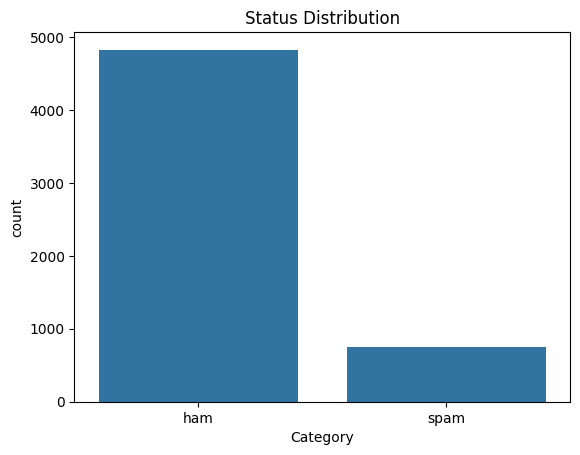

In [31]:
sns.countplot(x="Category",data=df).set(title="Status Distribution")

In [32]:
# Now we can also check the length of the mail text 
df["length"] = df["Message"].apply(len)
df

,Category,Message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ã¼ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [33]:
import plotly.express as px
px.histogram(df,x="length",nbins=500,title="length Distribution in data",
            color_discrete_sequence=['indianred'],
            opacity=0.8)

In [34]:
# Label the status as 1 or 0
df.loc[:,'Category']=df.Category.map({'ham':0, 'spam':1})
df['Category'] = df['Category'].astype(int)
df.head()

,Category,Message,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [35]:
from wordcloud import WordCloud, STOPWORDS
spam = df[df['Category']==1]
ham = df[df['Category']==0]

def wordcloud_generation(data,title):
    words = " ".join(df["Message"])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                         max_words=1500,
                         max_font_size=350,random_state=42,
                         width=2000,height=800,
                         colormap='tab20c',
                         repeat=False,
                         include_numbers=False,
                         collocations=True).generate(words)
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud,interpolation="nearest")
    plt.axis("off")
    plt.title(title)
    plt.show()

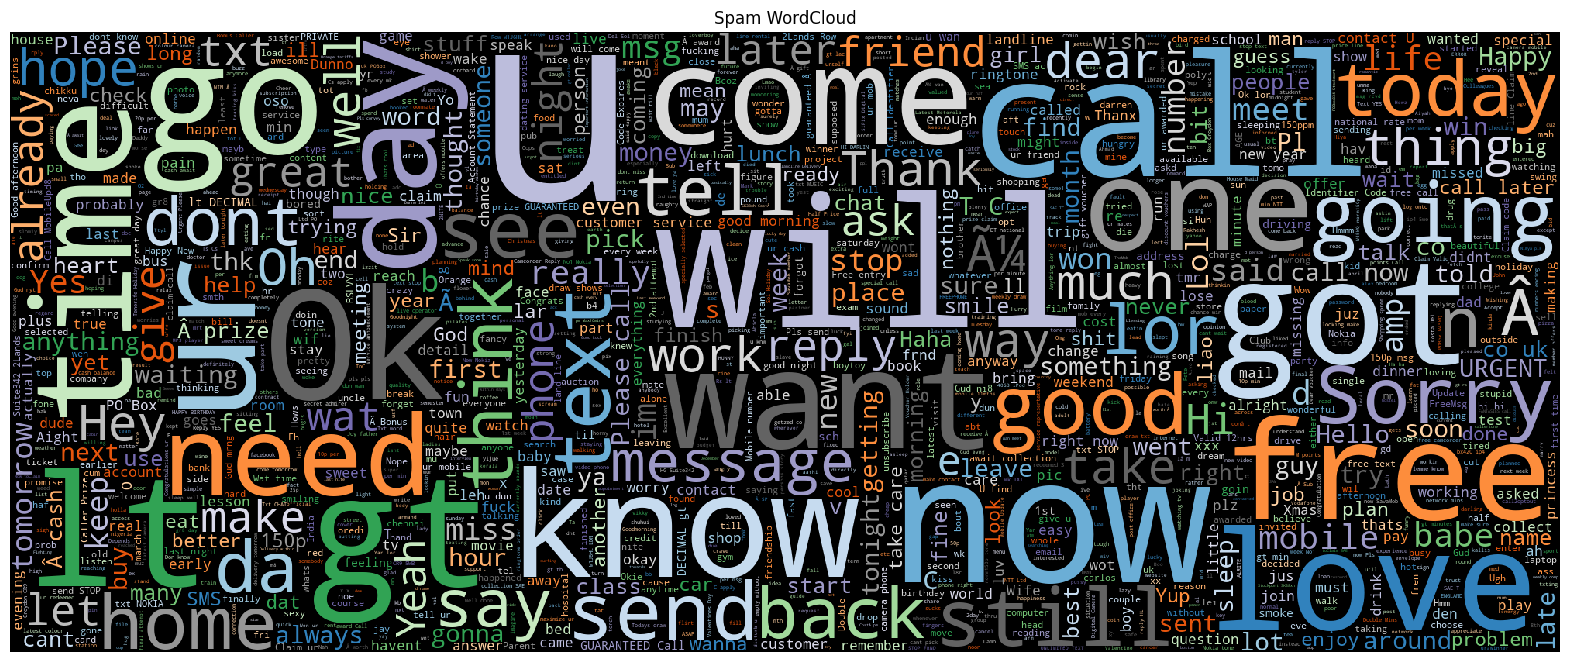

In [36]:
wordcloud_generation(spam, "Spam WordCloud")

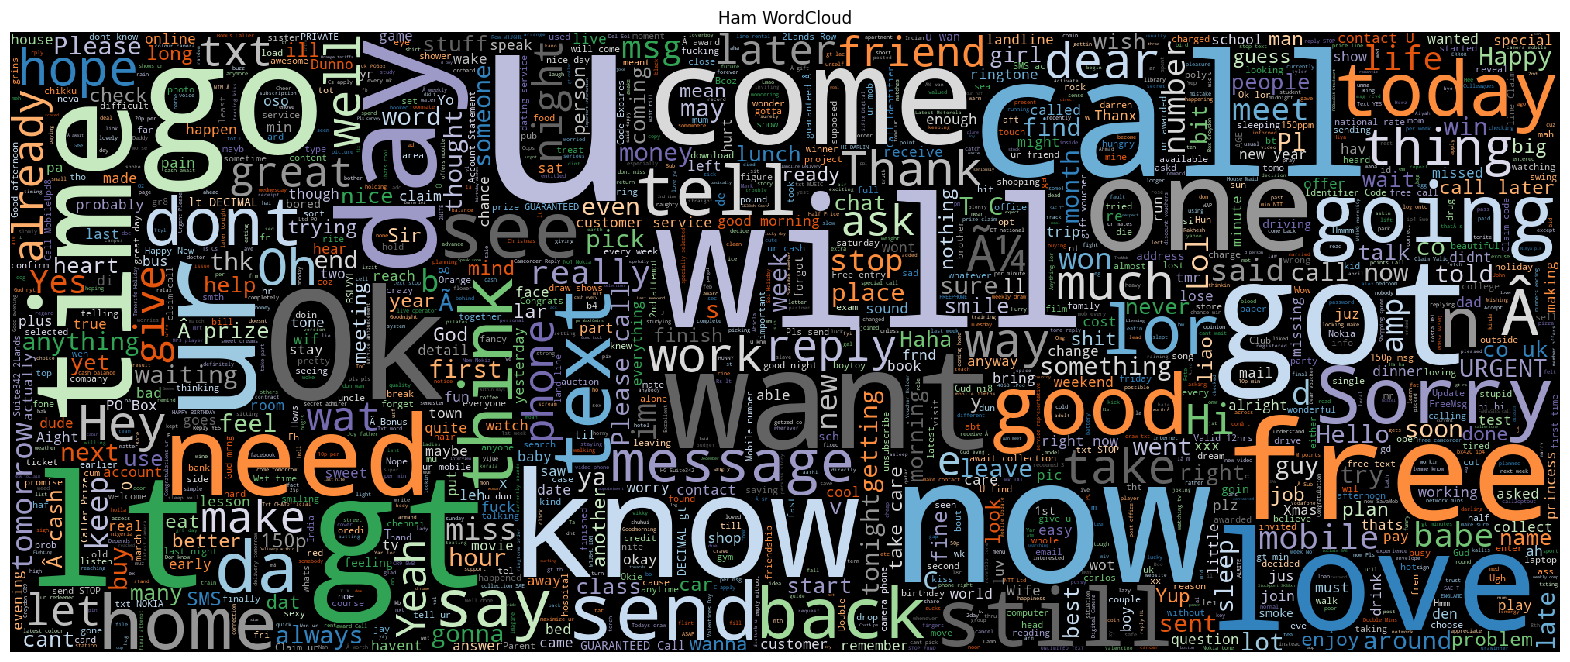

In [37]:
wordcloud_generation(ham, "Ham WordCloud")

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

vector = CountVectorizer()
text = vector.fit_transform(df["Message"])

X_train, X_test, y_train, y_test = train_test_split(text, df["Category"], test_size=0.3,
                                                   random_state=33)

In [39]:
print("The shape of respective train and test values : ")
print("X_train : " , X_train.shape)
print("X_test : " , X_test.shape)
print("y_train : " , y_train.shape)
print("y_test : " , y_test.shape)

The shape of respective train and test values : 
X_train :  (3900, 8745)
X_test :  (1672, 8745)
y_train :  (3900,)
y_test :  (1672,)


In [40]:
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [41]:
MLP = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000,
                    activation="relu",
                   alpha=0.001,
                   batch_size="auto",
                    early_stopping=False,
                    verbose=True,
                    learning_rate="adaptive")
MLP.fit(X_train,y_train)

predictions1 = MLP.predict(X_test)

print("Prediction results of MLP Classifier :: ")
print("----------------------------------------")
print("Accuracy score: {}". format(accuracy_score(y_test, predictions1)) )
print("Precision score: {}". format(precision_score(y_test, predictions1)) )
print("Recall score: {}". format(recall_score(y_test, predictions1)))
print("F1 score: {}". format(f1_score(y_test, predictions1)))

Iteration 1, loss = 0.44758553
Iteration 2, loss = 0.16506532
Iteration 3, loss = 0.05410367
Iteration 4, loss = 0.02290070
Iteration 5, loss = 0.01195535
Iteration 6, loss = 0.00703219
Iteration 7, loss = 0.00490985
Iteration 8, loss = 0.00384363
Iteration 9, loss = 0.00314558
Iteration 10, loss = 0.00264571
Iteration 11, loss = 0.00231709
Iteration 12, loss = 0.00203635
Iteration 13, loss = 0.00183028
Iteration 14, loss = 0.00167324
Iteration 15, loss = 0.00154732
Iteration 16, loss = 0.00143566
Iteration 17, loss = 0.00133952
Iteration 18, loss = 0.00126365
Iteration 19, loss = 0.00120067
Iteration 20, loss = 0.00113379
Iteration 21, loss = 0.00108573
Iteration 22, loss = 0.00104149
Iteration 23, loss = 0.00100511
Iteration 24, loss = 0.00096943
Iteration 25, loss = 0.00093831
Iteration 26, loss = 0.00091192
Iteration 27, loss = 0.00088863
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Prediction results of MLP Classifier :: 
--------------

In [42]:
MNC = MultinomialNB()
MNC.fit(X_train,y_train)
predictions2 = MNC.predict(X_test)

print("Prediction results of MNC Classifier :: ")
print("----------------------------------------")
print("Accuracy score: {}". format(accuracy_score(y_test, predictions2)) )
print("Precision score: {}". format(precision_score(y_test, predictions2)) )
print("Recall score: {}". format(recall_score(y_test, predictions2)))
print("F1 score: {}". format(f1_score(y_test, predictions2)))

Prediction results of MNC Classifier :: 
----------------------------------------
Accuracy score: 0.9844497607655502
Precision score: 0.9475982532751092
Recall score: 0.9393939393939394
F1 score: 0.9434782608695652


In [43]:
BC = BernoulliNB()
BC.fit(X_train,y_train)
predictions3 = MNC.predict(X_test)

print("Prediction results of BC Classifier :: ")
print("----------------------------------------")
print("Accuracy score: {}". format(accuracy_score(y_test, predictions3)) )
print("Precision score: {}". format(precision_score(y_test, predictions3)) )
print("Recall score: {}". format(recall_score(y_test, predictions3)))
print("F1 score: {}". format(f1_score(y_test, predictions3)))

Prediction results of BC Classifier :: 
----------------------------------------
Accuracy score: 0.9844497607655502
Precision score: 0.9475982532751092
Recall score: 0.9393939393939394
F1 score: 0.9434782608695652


In [44]:
compare_df =[]
models = [("Multinomial NB", MNC), ("Bernoulli NB", BC),("MLP Classifier", MLP) ]
for model_name, model in models:
    predictions = model.predict(X_test)
    Accuracy_Score = accuracy_score(y_test,predictions)
    Precision_Score = precision_score(y_test,predictions)
    Recall_Score = recall_score(y_test,predictions)
    F1_Score = f1_score(y_test,predictions)
    
    compare_df.append([model_name,Accuracy_Score,Precision_Score,Recall_Score,F1_Score])

compare_df = pd.DataFrame(compare_df, columns=["Model_Name","Accuracy_Score",
                                              "Precision_Score",
                                              "Recall_Score",
                                              "F1_Score"])
compare_df

,Model_Name,Accuracy_Score,Precision_Score,Recall_Score,F1_Score
0,Multinomial NB,0.984450,0.947598,0.939394,0.943478
1,Bernoulli NB,0.979665,0.975845,0.874459,0.922374
2,MLP Classifier,0.982656,0.995098,0.878788,0.933333


In [45]:
fig = px.bar(compare_df,x="Model_Name",y="Precision_Score",title="Precision_Score Comparison",)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

In [46]:
fig = px.bar(compare_df,x="Model_Name",y="Recall_Score",title="Recall_Score Comparison",)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

In [47]:
fig = px.bar(compare_df,x="Model_Name",y="F1_Score",title="F1_Score Comparison",)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

In [48]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Assuming X_train, y_train, X_test, y_test are properly defined

# Multinomial Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)

print("Multinomial Naive Bayes Scores:")
print("Training Accuracy:", nb.score(X_train, y_train))
print("Test Accuracy:", nb.score(X_test, y_test))

# Predict using Multinomial Naive Bayes
y_pred_nb = nb.predict(X_test)

# Confusion Matrix and Classification Report for Multinomial Naive Bayes
conf_nb = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix (Multinomial Naive Bayes):")
print(conf_nb)

classif_nb = classification_report(y_test, y_pred_nb)
print("Classification Report (Multinomial Naive Bayes):")
print(classif_nb)


Multinomial Naive Bayes Scores:
Training Accuracy: 0.9948717948717949
Test Accuracy: 0.9844497607655502
Confusion Matrix (Multinomial Naive Bayes):
[[1429   12]
 [  14  217]]
Classification Report (Multinomial Naive Bayes):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1441
           1       0.95      0.94      0.94       231

    accuracy                           0.98      1672
   macro avg       0.97      0.97      0.97      1672
weighted avg       0.98      0.98      0.98      1672



In [60]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

def test_model_with_input(model, vectorizer):
    # Get user input for the test data file
    test_file_path = input("Enter the path of the test data file: ")

    # Read the test data from the specified file
    test_data = pd.read_csv(test_file_path, encoding='latin-1')

    # Extract messages from the test data
    test_messages = test_data['Message']

    # Transform messages using the provided vectorizer
    test_text = vectorizer.transform(test_messages)

    # Predict labels for the test data using the given model
    test_predictions = model.predict(test_text)

    # Display the results
    print("\nPredictions:")
    for message, prediction in zip(test_messages, test_predictions):
        if prediction == 1:
            print(f"The message '{message}' is classified as spam.")
        else:
            print(f"The message '{message}' is classified as not spam.")
        
        print()
# Assuming df, vector, and MLP are already defined as in your code
test_model_with_input(MLP, vector)


Enter the path of the test data file: Book1.csv

Predictions:
The message 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...' is classified as not spam.

The message 'Ok lar... Joking wif u oni...' is classified as not spam.

The message 'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's' is classified as spam.

The message 'U dun say so early hor... U c already then say...' is classified as not spam.

The message 'Nah I don't think he goes to usf, he lives around here though' is classified as not spam.

The message 'FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv' is classified as not spam.

The message 'Even my brother is not like to speak with me. They treat me like aids patent.' is classified as not spam.

The message

In [62]:
def test_model_with_input(model, vectorizer):
    # Get user input for a single message
    user_input_message = input("Enter a message to classify: ")

    # Transform the user input using the provided vectorizer
    user_input_text = vectorizer.transform([user_input_message])

    # Predict the label for the user input using the given model
    user_input_prediction = model.predict(user_input_text)[0]

    # Display the result
    if user_input_prediction == 1:
        print(f"The message '{user_input_message}' is classified as spam.")
    else:
        print(f"The message '{user_input_message}' is classified as not spam.")

# Assuming vector and MLP are already defined as in your code
test_model_with_input(MLP, vector)

Enter a message to classify: Hello i am uday how are you
The message 'Hello i am uday how are you' is classified as not spam.


The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.
'kaggle' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


FileNotFoundError: [Errno 2] No such file or directory: 'creditcard.csv'